<a href="https://colab.research.google.com/github/VijayReddy-07/Housing_price_prediction/blob/main/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df['furnishingstatus'].nunique()

3

In [7]:
columns_to_transform = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea']
df[columns_to_transform] = df[columns_to_transform].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

/tmp/ipython-input-2182552935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_transform] = df[columns_to_transform].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2182552935.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = ['price', 'area']
df[sc] = scaler.fit_transform(df[sc])

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,2
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,2
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,2
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,2,1,1,1,0,1,0,0,2,0,0
541,-1.605149,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-1.614327,-0.705921,2,1,1,1,0,0,0,0,0,0,0
543,-1.614327,-1.033389,3,1,1,0,0,0,0,0,0,0,2


In [10]:
df.dtypes

,0
price,float64
area,float64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [11]:
corr_matrix = df.corr()

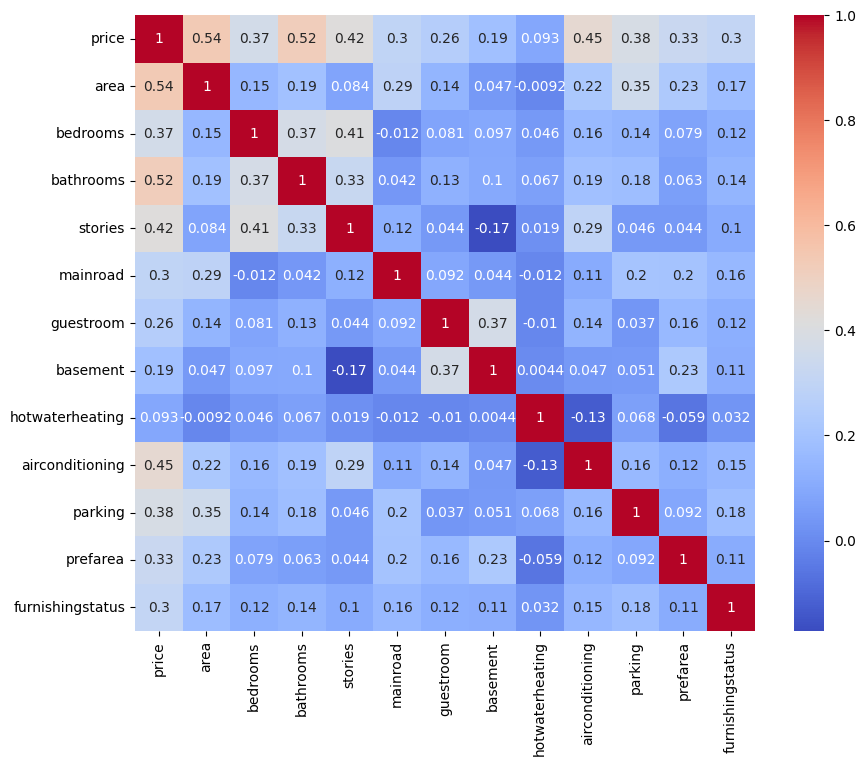

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

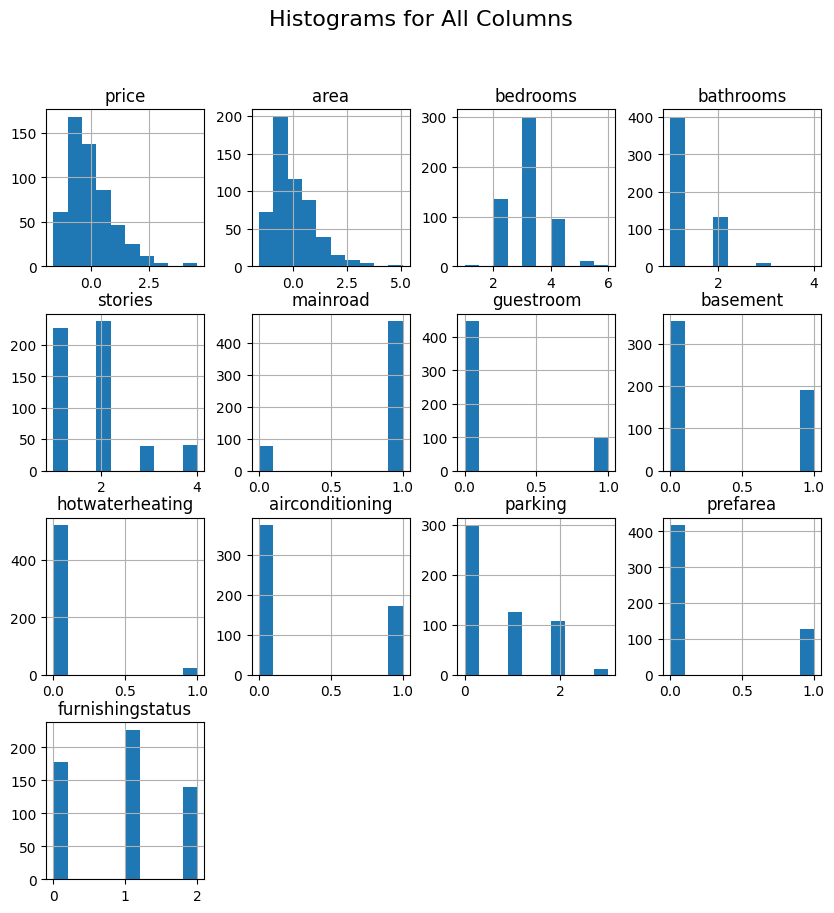

In [14]:
df.hist(figsize=(10, 10), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

In [15]:
X = df.drop('price', axis=1)
y = df['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [18]:
lr_y_pred = lr_model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
lr_accuracy = r2_score(y_test, lr_y_pred)*100

In [20]:
lr_accuracy

64.94754192267794